In [1]:
####
#condition = "Back pain"
#intervention = "yoga OR tai chi OR exercise"
#aggFilters = "results:with,status:act com ter,studyType:int"
#pageSize = 100
#status = "COMPLETED"
#### Ethnicity
import pandas as pd
import sqlite3
from contextlib import closing
import psycopg2

nct_id_list = ['NCT02391350', 'NCT02355275', 'NCT00285649', 'NCT01362049', 'NCT03644927', 'NCT00939107', 'NCT01312233', 'NCT01221233', 'NCT02308189', 'NCT00118430', 'NCT01918189', 'NCT02353442', 'NCT03504085', 'NCT03502187', 'NCT01559948', 'NCT02327325', 'NCT02469077', 'NCT00786864', 'NCT02503410', 'NCT03415464', 'NCT02132910', 'NCT03816007', 'NCT01726803', 'NCT01841216', 'NCT03554746', 'NCT02027623', 'NCT03046472', 'NCT02864732', 'NCT02524158', 'NCT00561652', 'NCT02122445', 'NCT03484403', 'NCT01539863', 'NCT01653782', 'NCT03603028', 'NCT02868034', 'NCT03360344', 'NCT04468074', 'NCT00803413', 'NCT03888235', 'NCT04209335', 'NCT01611792', 'NCT02645760', 'NCT02938169', 'NCT01374269']

def extract_aact(nct_ids):
    connection = psycopg2.connect(
        database="aact",
        user= "achang",
        password="AChang2608",
        host="aact-db.ctti-clinicaltrials.org",
    )

    with closing(connection.cursor()) as cursor:
        # Prepare the SQL query with format string for nct_ids
        query = f"""
            SELECT nct_id, result_group_id, ctgov_group_code, param_value, classification, category
            FROM baseline_measurements
            WHERE (title = 'Race (NIH/OMB)' OR title = 'Race/Ethnicity, Customized')
            AND nct_id IN ({', '.join(["'%s'" % id for id in nct_ids])});
        """
        cursor.execute(query)
        patients = cursor.fetchall()

    columns = [
        'nct_id',
        'result_group_id',
        'ctgov_group_code',
        'number',
        'classification',
        'category',
    ]

    df = pd.DataFrame(patients, columns=columns)

    nunique=df['nct_id'].nunique()
    unique_nct_ids = df['nct_id'].unique()
    #print(unique_nct_ids)
    #print(nunique)
    return(df)
    



extracted_race= extract_aact(nct_id_list)
print(extracted_race)


max_result_group_id = extracted_race.groupby('nct_id')['result_group_id'].transform('max')

# Select rows where 'result_group_id' is equal to the max within its group
filtered_extracted_race = extracted_race[extracted_race['result_group_id'] == max_result_group_id]

print(filtered_extracted_race)

filtered_extracted_race.loc[filtered_extracted_race['category'].isnull(), 'category'] = filtered_extracted_race['classification']

category_mapping = {
    'Black': 'Black or African American',
    'BLACK OR AFRICAN AMERICAN' : 'Black or African American',
    'Black Or African American' : 'Black or African American',
    'ASIAN' : 'Asian',
    'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER': 'Native Hawaiian or Other Pacific Islander',
    'Native Hawaiian or Pacific Islander':'Native Hawaiian or Other Pacific Islander',
    'White or Caucasian': 'White',
    'AMERICAN INDIAN OR ALASKA NATIVE': 'American Indian or Alaska Native',
    'American Indian Or Alaska Native': 'American Indian or Alaska Native',
    'WHITE': 'White',
    'Unknown': 'Unknown or Not Reported',
    'Missing': 'Unknown or Not Reported',
    'Other': 'Unknown or Not Reported',
    'OTHER' : 'Unknown or Not Reported',
    'MISSING': 'Unknown or Not Reported',
    'No ethnicity': 'Unknown or Not Reported',
    'Other, not specified': 'Unknown or Not Reported',
    'Multiple': 'Unknown or Not Reported'
}

categories_to_remove = ["HISPANIC OR LATINO", "NOT HISPANIC OR LATINO","NOT KNOWN, NOT RECORDED, OR REFUSED"]

filtered_extracted_race['category'] = filtered_extracted_race['category'].replace(category_mapping)
filtered_extracted_race = filtered_extracted_race[~filtered_extracted_race['category'].isin(categories_to_remove)]
filtered_extracted_race = filtered_extracted_race.drop('classification', axis=1)
# Specify the file name for your CSV
race = "filtered_extracted_race.csv"

# Save the DataFrame to a CSV file
filtered_extracted_race.to_csv(race, index=False)




          nct_id  result_group_id ctgov_group_code number classification  \
0    NCT02469077         75445851            BG000      0           None   
1    NCT02469077         75445852            BG001      0           None   
2    NCT02469077         75445853            BG002      0           None   
3    NCT02469077         75445851            BG000      2           None   
4    NCT02469077         75445852            BG001      1           None   
..           ...              ...              ...    ...            ...   
513  NCT03504085         75182069            BG001      0           None   
514  NCT03504085         75182070            BG002      0           None   
515  NCT03504085         75182068            BG000      0           None   
516  NCT03504085         75182069            BG001      0           None   
517  NCT03504085         75182070            BG002      0           None   

                             category  
0    American Indian or Alaska Native  
1    Am

/var/folders/64/x7_jk0ds5174rzhfbs9sv8b80000gn/T/ipykernel_15024/278545.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_extracted_race['category'] = filtered_extracted_race['category'].replace(category_mapping)


In [2]:
num_unique_values = filtered_extracted_race['category'].nunique()
print(f"Number of unique values in 'category': {num_unique_values}")

# Print out the unique values in the 'category' column
unique_values = filtered_extracted_race['category'].unique()
print("Unique values in 'category':")
print(unique_values)

Number of unique values in 'category': 26
Unique values in 'category':
['American Indian or Alaska Native' 'Asian'
 'Native Hawaiian or Other Pacific Islander' 'Black or African American'
 'White' 'More than one race' 'Unknown or Not Reported'
 'American Indian or Alaskan Native' 'Asian or Pacific Islander'
 'Nonhispanic Black' 'Hispanic' 'Nonhispanic White' 'Caucasian'
 'African American' 'Asian/Pacific' 'Amer. Indian/Alaska Native'
 'Multi-racial' 'African American/Black' 'Caucasian/White'
 'Hispanic or Latino' 'Hispanic/Latino' 'Caucasian or White'
 'Latino/Hispanic' 'Non-Hispanic' 'Mixed' 'Hispaic']


nct_ids in the list but not in the extracted data: {'NCT02034916', 'NCT00679783'}
2 studies no ethnicities

nct_ids in the list but not in the extracted data: {'NCT03343054', 'NCT01818063', 'NCT02734004', 'NCT02657889', 'NCT01905592', 'NCT04690855', 'NCT01506609'}

1st study: Age, customized in title, : <18,18-44, 45-64, >65 in classification
2nd study: Age, categorical in title, , <18, 18-65, >65, in category
3rd study: Age, categorical in title, <18, 18-65, >65, in category
4th study: Age, categorical in title:  as above
5th study: Age, customized: 18-64, 65-74, >75 in category
6th study: Age, categorical in title in category
7t study: Age, customized, <45, 45-64, >65 in category






In [3]:
### Age with custom and categorical
nct_id_list = ['NCT02391350', 'NCT02355275', 'NCT00285649', 'NCT01362049', 'NCT03644927', 'NCT00939107', 'NCT01312233', 'NCT01221233', 'NCT02308189', 'NCT00118430', 'NCT01918189', 'NCT02353442', 'NCT03504085', 'NCT03502187', 'NCT01559948', 'NCT02327325', 'NCT02469077', 'NCT00786864', 'NCT02503410', 'NCT03415464', 'NCT02132910', 'NCT03816007', 'NCT01726803', 'NCT01841216', 'NCT03554746', 'NCT02027623', 'NCT03046472', 'NCT02864732', 'NCT02524158', 'NCT00561652', 'NCT02122445', 'NCT03484403', 'NCT01539863', 'NCT01653782', 'NCT03603028', 'NCT02868034', 'NCT03360344', 'NCT04468074', 'NCT00803413', 'NCT03888235', 'NCT04209335', 'NCT01611792', 'NCT02645760', 'NCT02938169', 'NCT01374269']

def extract_aact_age_extra(nct_ids):
    connection = psycopg2.connect(
        database="aact",
        user= "achang",
        password="AChang2608",
        host="aact-db.ctti-clinicaltrials.org",
    )

    with closing(connection.cursor()) as cursor:
        query = f"""
        SELECT m.nct_id, m.result_group_id, m.classification, m.category, m.title, m.param_value, b.count, m.dispersion_type, m.dispersion_value
        FROM baseline_measurements m
        LEFT JOIN baseline_counts b on m.result_group_id=b.result_group_id
        WHERE (title = 'Age, Continuous')
        AND m.nct_id IN ({', '.join(["'%s'" % id for id in nct_ids])});;
        """
        cursor.execute(query)
        patients = cursor.fetchall()
        
        columns = [
        'nct_id',
        'result_group_id',
        'classification',
        'category',
        'title',
        'number',
        'total_count',
        'dispersion_type',
        'dispersion_value'
    ]

    df = pd.DataFrame(patients, columns=columns)

    nunique=df['nct_id'].nunique()
    unique_nct_ids = df['nct_id'].unique()
    #print(unique_nct_ids)
    print(nunique)
    return(df)
    


extracted_age_extra= extract_aact_age_extra(nct_id_list)
print(extracted_age_extra)


max_result_group_id = extracted_age_extra.groupby('nct_id')['result_group_id'].transform('max')

# Select rows where 'result_group_id' is equal to the max within its group
filtered_extracted_age_extra = extracted_age_extra[extracted_age_extra['result_group_id'] == max_result_group_id]

# Specify the file name for your CSV
age_extra = "filtered_extracted_age_extra.csv"

# Save the DataFrame to a CSV file
filtered_extracted_age_extra.to_csv(age_extra, index=False)


39
          nct_id  result_group_id classification category            title  \
0    NCT02503410         75053952           None     None  Age, Continuous   
1    NCT03415464         75207200           None     None  Age, Continuous   
2    NCT03415464         75207201           None     None  Age, Continuous   
3    NCT03502187         75359990           None     None  Age, Continuous   
4    NCT03502187         75359992           None     None  Age, Continuous   
..           ...              ...            ...      ...              ...   
122  NCT02327325         75432882           None     None  Age, Continuous   
123  NCT02327325         75432883           None     None  Age, Continuous   
124  NCT02327325         75432884           None     None  Age, Continuous   
125  NCT01611792         75019716           None     None  Age, Continuous   
126  NCT03888235         75180546           None     None  Age, Continuous   

    number  total_count     dispersion_type dispersion_value

In [4]:
# Ensure that 'number' and 'total_count' columns are numeric
filtered_extracted_age_extra['number'] = pd.to_numeric(filtered_extracted_age_extra['number'], errors='coerce')
filtered_extracted_age_extra['total_count'] = pd.to_numeric(filtered_extracted_age_extra['total_count'], errors='coerce')

# Calculate the product
filtered_extracted_age_extra['product'] = filtered_extracted_age_extra['number'] * filtered_extracted_age_extra['total_count']

# Calculate the sum of the product
total_sum = filtered_extracted_age_extra['product'].sum()

# Calculate the sum of 'total_count'
total_participants = filtered_extracted_age_extra['total_count'].sum()

# Calculate the average age
# Check if total_participants is not zero to avoid division by zero
if total_participants != 0:
    average_age = total_sum / total_participants
    print("Average Age:", average_age)
else:
    print("Total number of participants is zero, cannot compute average age.")

Average Age: 44.610015970188975


/var/folders/64/x7_jk0ds5174rzhfbs9sv8b80000gn/T/ipykernel_15024/147986295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_extracted_age_extra['number'] = pd.to_numeric(filtered_extracted_age_extra['number'], errors='coerce')
/var/folders/64/x7_jk0ds5174rzhfbs9sv8b80000gn/T/ipykernel_15024/147986295.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_extracted_age_extra['total_count'] = pd.to_numeric(filtered_extracted_age_extra['total_count'], errors='coerce')
/var/folders/64/x7_jk0ds

/var/folders/64/x7_jk0ds5174rzhfbs9sv8b80000gn/T/ipykernel_15024/477920110.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_extracted_age_extra['number'] = pd.to_numeric(filtered_extracted_age_extra['number'], errors='coerce')
/var/folders/64/x7_jk0ds5174rzhfbs9sv8b80000gn/T/ipykernel_15024/477920110.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_extracted_age_extra['total_count'] = pd.to_numeric(filtered_extracted_age_extra['total_count'], errors='coerce')
/var/folders/64/x7_jk0ds

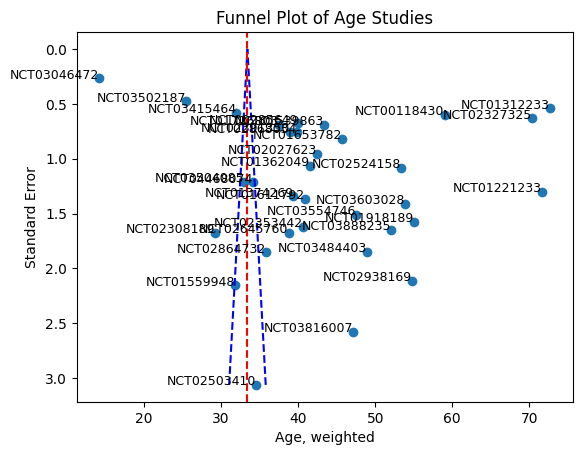

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'filtered_extracted_age_extra' is your DataFrame

# Convert columns to appropriate types
filtered_extracted_age_extra['number'] = pd.to_numeric(filtered_extracted_age_extra['number'], errors='coerce')
filtered_extracted_age_extra['total_count'] = pd.to_numeric(filtered_extracted_age_extra['total_count'], errors='coerce')
filtered_extracted_age_extra['dispersion_value'] = pd.to_numeric(filtered_extracted_age_extra['dispersion_value'], errors='coerce')

# Filter rows where necessary data is available
df = filtered_extracted_age_extra[(filtered_extracted_age_extra['dispersion_type'] == 'Standard Deviation') & filtered_extracted_age_extra['number'].notnull() & filtered_extracted_age_extra['total_count'].notnull() & filtered_extracted_age_extra['dispersion_value'].notnull()]

# Calculate standard error for individual studies
df['standard_error'] = df['dispersion_value'] / np.sqrt(df['total_count'])

# Calculate weights (inverse of variance)
df['weight'] = 1 / (df['dispersion_value'] ** 2)

# Calculate the overall weighted mean age
overall_weighted_mean_age = sum(df['number'] * df['weight']) / sum(df['weight'])

# Calculate the standard error of the combined effect
standard_error_combined = np.sqrt(1 / sum(df['weight']))

# Define start points for the 95% confidence interval lines
start_left = overall_weighted_mean_age - 1.96 * standard_error_combined
start_right = overall_weighted_mean_age + 1.96 * standard_error_combined
for index, row in df.iterrows():
    plt.text(row['number'], row['standard_error'], row['nct_id'], fontsize=9, ha='right')

# Create funnel plot
plt.scatter(df['number'], df['standard_error'])

# Add diagonal lines
plt.plot([start_left, overall_weighted_mean_age], [max(df['standard_error']), 0], color='blue', linestyle='--')
plt.plot([start_right, overall_weighted_mean_age], [max(df['standard_error']), 0], color='blue', linestyle='--')

# Plot settings
plt.xlabel('Age, weighted')
plt.ylabel('Standard Error')
plt.title('Funnel Plot of Age Studies')
plt.axvline(x=overall_weighted_mean_age, color='red', linestyle='--')
plt.gca().invert_yaxis()
plt.show()


In [6]:
num_unique_values = filtered_extracted_age_extra['nct_id'].nunique()
print(f"Number of unique values in 'category': {num_unique_values}")

# Print out the unique values in the 'category' column
unique_values = filtered_extracted_age_extra['nct_id'].unique()
print("Unique values in 'category':")
print(unique_values)

Number of unique values in 'category': 39
Unique values in 'category':
['NCT02503410' 'NCT03484403' 'NCT03603028' 'NCT01374269' 'NCT01362049'
 'NCT01539863' 'NCT02027623' 'NCT01918189' 'NCT02122445' 'NCT02645760'
 'NCT03415464' 'NCT01559948' 'NCT00118430' 'NCT01841216' 'NCT03888235'
 'NCT02355275' 'NCT01312233' 'NCT02308189' 'NCT03644927' 'NCT04468074'
 'NCT02864732' 'NCT03554746' 'NCT02524158' 'NCT01726803' 'NCT04209335'
 'NCT03046472' 'NCT01221233' 'NCT03360344' 'NCT03504085' 'NCT03502187'
 'NCT02353442' 'NCT00285649' 'NCT03816007' 'NCT01653782' 'NCT02938169'
 'NCT02391350' 'NCT02868034' 'NCT01611792' 'NCT02327325']


In [7]:
### trial design

nct_id_list = ['NCT02391350', 'NCT02355275', 'NCT00285649', 'NCT01362049', 'NCT03644927', 'NCT00939107', 'NCT01312233', 'NCT01221233', 'NCT02308189', 'NCT00118430', 'NCT01918189', 'NCT02353442', 'NCT03504085', 'NCT03502187', 'NCT01559948', 'NCT02327325', 'NCT02469077', 'NCT00786864', 'NCT02503410', 'NCT03415464', 'NCT02132910', 'NCT03816007', 'NCT01726803', 'NCT01841216', 'NCT03554746', 'NCT02027623', 'NCT03046472', 'NCT02864732', 'NCT02524158', 'NCT00561652', 'NCT02122445', 'NCT03484403', 'NCT01539863', 'NCT01653782', 'NCT03603028', 'NCT02868034', 'NCT03360344', 'NCT04468074', 'NCT00803413', 'NCT03888235', 'NCT04209335', 'NCT01611792', 'NCT02645760', 'NCT02938169', 'NCT01374269']

def extract_aact_design(nct_ids):
    connection = psycopg2.connect(
        database="aact",
        user= "achang",
        password="AChang2608",
        host="aact-db.ctti-clinicaltrials.org",
    )

    with closing(connection.cursor()) as cursor:
        query = f"""
        SELECT nct_id, allocation, intervention_model, masking, subject_masked, caregiver_masked, investigator_masked, outcomes_assessor_masked
        FROM designs
        WHERE nct_id IN ({', '.join(["'%s'" % id for id in nct_ids])});
        """
        cursor.execute(query)
        patients = cursor.fetchall()
        
        columns = [
        'nct_id',
        'allocation',
        'intervention_model',
        'masking',
        'subject_masked',
        'caregiver_masked',
        'investigator_masked',
        'outcomes_assessor_masked'
    ]

    df = pd.DataFrame(patients, columns=columns)

    nunique=df['nct_id'].nunique()
    unique_nct_ids = df['nct_id'].unique()
    #print(unique_nct_ids)
    print(nunique)
    return(df)
    



extracted_designs= extract_aact_design(nct_id_list)
print(extracted_designs)

# Specify the file name for your CSV
designs = "extracted_designs.csv"

# Save the DataFrame to a CSV file
extracted_designs.to_csv(designs, index=False)




45
         nct_id      allocation       intervention_model            masking  \
0   NCT01312233      Randomized      Parallel Assignment             Single   
1   NCT00118430      Randomized      Parallel Assignment  None (Open Label)   
2   NCT03603028             N/A  Single Group Assignment  None (Open Label)   
3   NCT02122445             N/A  Single Group Assignment  None (Open Label)   
4   NCT03554746      Randomized      Parallel Assignment  None (Open Label)   
5   NCT02524158      Randomized      Parallel Assignment             Single   
6   NCT02868034      Randomized     Factorial Assignment             Double   
7   NCT01559948      Randomized      Parallel Assignment             Double   
8   NCT03816007      Randomized      Parallel Assignment             Single   
9   NCT03484403      Randomized      Parallel Assignment  None (Open Label)   
10  NCT02355275             N/A  Single Group Assignment  None (Open Label)   
11  NCT00803413      Randomized      Parallel Ass

In [8]:

### interventions

nct_id_list = ['NCT02391350', 'NCT02355275', 'NCT00285649', 'NCT01362049', 'NCT03644927', 'NCT00939107', 'NCT01312233', 'NCT01221233', 'NCT02308189', 'NCT00118430', 'NCT01918189', 'NCT02353442', 'NCT03504085', 'NCT03502187', 'NCT01559948', 'NCT02327325', 'NCT02469077', 'NCT00786864', 'NCT02503410', 'NCT03415464', 'NCT02132910', 'NCT03816007', 'NCT01726803', 'NCT01841216', 'NCT03554746', 'NCT02027623', 'NCT03046472', 'NCT02864732', 'NCT02524158', 'NCT00561652', 'NCT02122445', 'NCT03484403', 'NCT01539863', 'NCT01653782', 'NCT03603028', 'NCT02868034', 'NCT03360344', 'NCT04468074', 'NCT00803413', 'NCT03888235', 'NCT04209335', 'NCT01611792', 'NCT02645760', 'NCT02938169', 'NCT01374269']

def extract_aact_intervention(nct_ids):
    connection = psycopg2.connect(
        database="aact",
        user= "achang",
        password="AChang2608",
        host="aact-db.ctti-clinicaltrials.org",
    )

    with closing(connection.cursor()) as cursor:
        query = f"""
        SELECT d.nct_id, d.intervention_id, i.name, i.description, de.title
        FROM design_group_interventions d
        LEFT JOIN interventions i on d.intervention_id=i.id
        LEFT JOIN design_groups de on de.id=d.design_group_id
        WHERE d.nct_id IN ({', '.join(["'%s'" % id for id in nct_ids])});
        """
        cursor.execute(query)
        patients = cursor.fetchall()
        
        columns = [
        'nct_id',
        'intervention_id',
        'name',
        'description',
        'title'
    ]

    df = pd.DataFrame(patients, columns=columns)

    nunique=df['nct_id'].nunique()
    unique_nct_ids = df['nct_id'].unique()
    #print(unique_nct_ids)
    print(nunique)
    return(df)
    



extracted_intervention= extract_aact_intervention(nct_id_list)
print(extracted_intervention)



# Specify the file name for your CSV
interventions = "extracted_interventions.csv"

# Save the DataFrame to a CSV file
extracted_intervention.to_csv(interventions, index=False)



45
          nct_id  intervention_id                                    name  \
0    NCT03360344         74990102                    Kinesio 12 inch Tape   
1    NCT03360344         74990103                     Kinesio 4 inch Tape   
2    NCT03360344         74990104  Cock up Splint and Lumbrical exercises   
3    NCT03816007         75155031             Yoga and Mantram Repetition   
4    NCT03816007         75155032                            Veteran Calm   
..           ...              ...                                     ...   
124  NCT03502187         75077159           Primary Care Management (PCM)   
125  NCT03502187         75077159           Primary Care Management (PCM)   
126  NCT03502187         75077159           Primary Care Management (PCM)   
127  NCT01221233         74790013    Neuromuscular Electrical Stimulation   
128  NCT01221233         74790014                              Moist Heat   

                                           description  \
0    Kinesio T

In [9]:
#### sex


nct_id_list = ['NCT02391350', 'NCT02355275', 'NCT00285649', 'NCT01362049', 'NCT03644927', 'NCT00939107', 'NCT01312233', 'NCT01221233', 'NCT02308189', 'NCT00118430', 'NCT01918189', 'NCT02353442', 'NCT03504085', 'NCT03502187', 'NCT01559948', 'NCT02327325', 'NCT02469077', 'NCT00786864', 'NCT02503410', 'NCT03415464', 'NCT02132910', 'NCT03816007', 'NCT01726803', 'NCT01841216', 'NCT03554746', 'NCT02027623', 'NCT03046472', 'NCT02864732', 'NCT02524158', 'NCT00561652', 'NCT02122445', 'NCT03484403', 'NCT01539863', 'NCT01653782', 'NCT03603028', 'NCT02868034', 'NCT03360344', 'NCT04468074', 'NCT00803413', 'NCT03888235', 'NCT04209335', 'NCT01611792', 'NCT02645760', 'NCT02938169', 'NCT01374269']

def extract_aact_sex(nct_ids):
    connection = psycopg2.connect(
        database="aact",
        user= "achang",
        password="AChang2608",
        host="aact-db.ctti-clinicaltrials.org",
    )

    with closing(connection.cursor()) as cursor:
        # Prepare the SQL query with format string for nct_ids
        query = f"""
            SELECT nct_id, result_group_id, ctgov_group_code, category,title, param_value
            FROM baseline_measurements
            WHERE (title ='Sex: Female, Male' )
            AND nct_id IN ({', '.join(["'%s'" % id for id in nct_ids])});
        """
        cursor.execute(query)
        patients = cursor.fetchall()

    columns = [
        'nct_id',
        'result_group_id',
        'ctgov_group_code',
        'category',
        'title',
        'param_value'
    ]

    df = pd.DataFrame(patients, columns=columns)

    nunique=df['nct_id'].nunique()
    unique_nct_ids = df['nct_id'].unique()
    #print(unique_nct_ids)
    #print(nunique)
    return(df)
    



extracted_sex= extract_aact_sex(nct_id_list)
#print(extracted_race)


max_result_group_id = extracted_sex.groupby('nct_id')['result_group_id'].transform('max')

# Select rows where 'result_group_id' is equal to the max within its group
filtered_extracted_sex = extracted_sex[extracted_sex['result_group_id'] == max_result_group_id]



# Specify the file name for your CSV
sex = "filtered_extracted_sex.csv"

# Save the DataFrame to a CSV file
filtered_extracted_sex.to_csv(sex, index=False)



In [10]:
#### outcomes


nct_id_list = ['NCT02391350', 'NCT02355275', 'NCT00285649', 'NCT01362049', 'NCT03644927', 'NCT00939107', 'NCT01312233', 'NCT01221233', 'NCT02308189', 'NCT00118430', 'NCT01918189', 'NCT02353442', 'NCT03504085', 'NCT03502187', 'NCT01559948', 'NCT02327325', 'NCT02469077', 'NCT00786864', 'NCT02503410', 'NCT03415464', 'NCT02132910', 'NCT03816007', 'NCT01726803', 'NCT01841216', 'NCT03554746', 'NCT02027623', 'NCT03046472', 'NCT02864732', 'NCT02524158', 'NCT00561652', 'NCT02122445', 'NCT03484403', 'NCT01539863', 'NCT01653782', 'NCT03603028', 'NCT02868034', 'NCT03360344', 'NCT04468074', 'NCT00803413', 'NCT03888235', 'NCT04209335', 'NCT01611792', 'NCT02645760', 'NCT02938169', 'NCT01374269']

def extract_aact_outcomes(nct_ids):
    connection = psycopg2.connect(
        database="aact",
        user= "achang",
        password="AChang2608",
        host="aact-db.ctti-clinicaltrials.org",
    )

    with closing(connection.cursor()) as cursor:
        # Prepare the SQL query with format string for nct_ids
        query = f"""
            SELECT nct_id, outcome_type, measure
            FROM design_outcomes
            WHERE nct_id IN ({', '.join(["'%s'" % id for id in nct_ids])}) ;
        """
        cursor.execute(query)
        patients = cursor.fetchall()

    columns = [
        'nct_id',
        'outcome_type',
        'measure'
    ]

    df = pd.DataFrame(patients, columns=columns)

    nunique=df['nct_id'].nunique()
    unique_nct_ids = df['nct_id'].unique()
    #print(unique_nct_ids)
    #print(nunique)
    return(df)

extracted_outcomes= extract_aact_outcomes(nct_id_list)
    
print(extracted_outcomes)

          nct_id outcome_type  \
0    NCT00285649      primary   
1    NCT04209335      primary   
2    NCT04209335    secondary   
3    NCT04209335    secondary   
4    NCT04209335    secondary   
..           ...          ...   
360  NCT02391350        other   
361  NCT02355275      primary   
362  NCT02355275    secondary   
363  NCT01841216      primary   
364  NCT01841216    secondary   

                                               measure  
0    Roland Morris Low Back Pain Disability Questio...  
1                                Core Muscle Endurance  
2                                      Body Mass Index  
3                Physical Activity Level Questionnaire  
4    Number of Participants Who Have Experienced No...  
..                                                 ...  
360        Number of Participants Utilizing Healthcare  
361                          Oswestry Disability Index  
362                          Numeric Pain Rating Scale  
363  Percent of Maximal Voluntary